# Майнор по Анализу Данных, Группа ИАД-4
## 23/11/2017 Введение в статистику

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Непрерывные распределения

## Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [2]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10) # rvs - random variable sample

array([ 1.9171236 ,  3.25043656,  1.91859026,  2.47291498,  2.43438614,
        2.17915277,  2.62002364,  2.0752772 ,  1.4479177 ,  1.32764436])

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [3]:
norm_rv.cdf(3)

0.97724986805182079

Построим график функции распределения:

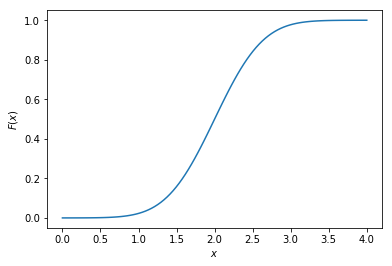

In [4]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [5]:
norm_rv.pdf(3)

0.10798193302637613

Построим график функции плотности вероятности:

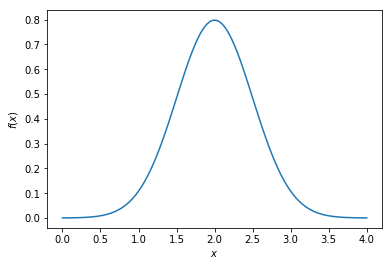

In [6]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [7]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([ 3.27807344,  2.90646154,  2.88166871,  1.72993178,  3.83957323,
        2.83973655,  1.60195647,  3.1466172 ,  1.18411527,  2.94769974])

А так — вычислять значения функций распределения и плотностей:

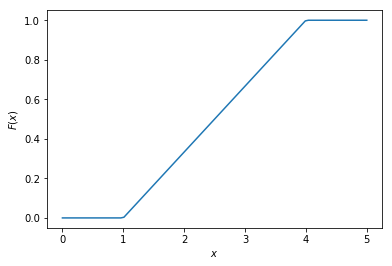

In [8]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

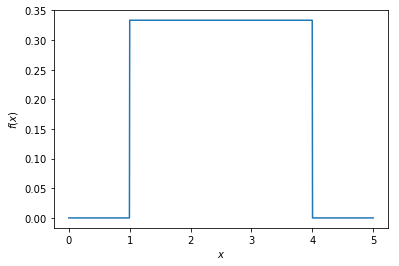

In [9]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [10]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Биномиальное распределение

Генерация выборок из биномиального распределения:

In [11]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([14, 11, 16, 16, 14, 11, 12, 13, 10, 13])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

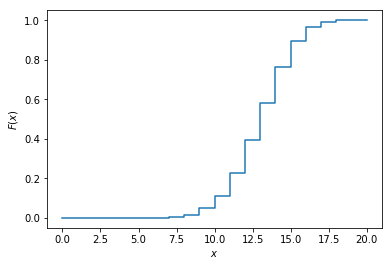

In [12]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

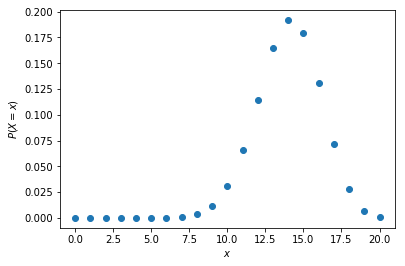

In [13]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

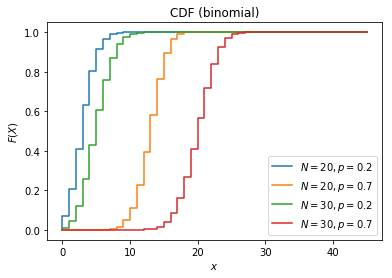

In [14]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

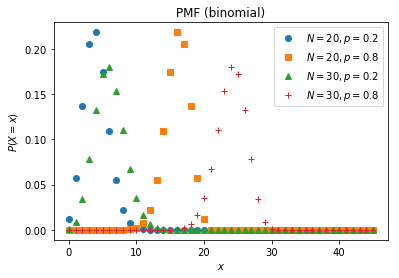

In [15]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

## Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [16]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([6, 5, 5, 7, 3, 2, 4, 5, 5, 8])

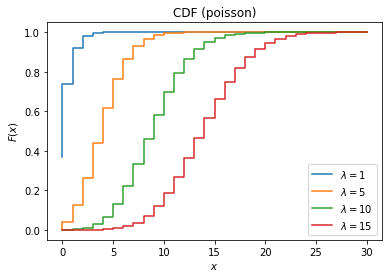

In [17]:
x = np.linspace(0,30,31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

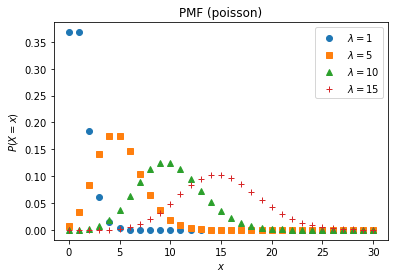

In [18]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

## Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [19]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities) # если не указывать вероятности, они будут равными

array([ 5,  5,  1, 12,  1,  5,  1,  5,  5,  5])

## Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее наутральный параметр $k$, который называется числом степеней свободы:

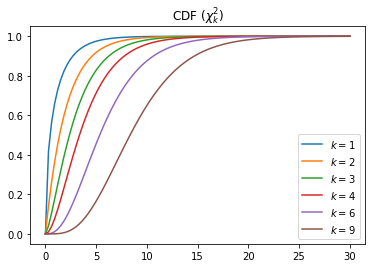

In [20]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

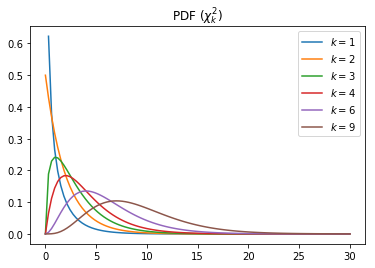

In [21]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://scipy.github.io/devdocs/stats.html#module-scipy.stats

# Генерация выборок из распределений

## Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [22]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [23]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({2: 24, 4: 21, 5: 20, 6: 14, 3: 12, 1: 9})
Вероятности выпадений каждой из сторон:
{4: 0.21, 6: 0.14, 2: 0.24, 1: 0.09, 3: 0.12, 5: 0.2}


Это и есть оценка функции вероятности дискретного распределения.

## Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [24]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Эмпирическая функция распределения для полученной выборки:

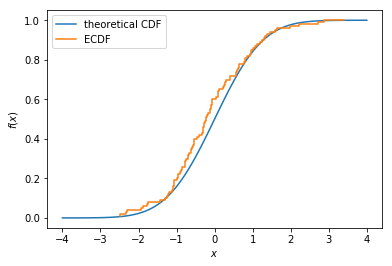

In [25]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

In [39]:
# my way
probs = []
for i in range(1, len(sorted(sample))+1):
    probs.append(i/len(sample))
probs[:5]

[0.01, 0.02, 0.03, 0.04, 0.05]

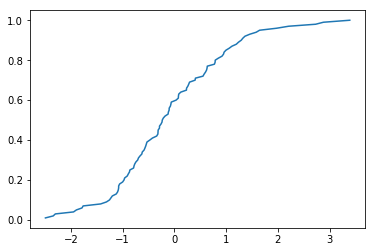

In [38]:
plt.plot(sorted(sample), probs)

In [41]:
# optimal way
sample.sort()
probs_1 = np.ones_like(sample)/sample.shape[0]
probs[:5]

[0.01, 0.02, 0.03, 0.04, 0.05]

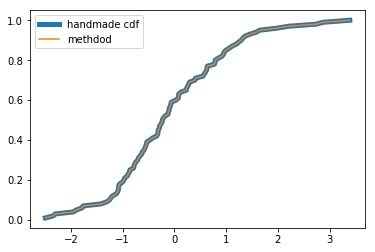

In [42]:
plt.plot(sample, probs, label='handmade cdf', lw=5) #  проверяем, сделали ли мы как комп
plt.plot(ecdf.x, ecdf.y, label='methdod')
plt.legend()

Гистограмма выборки:

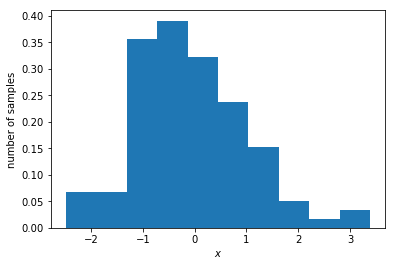

In [27]:
plt.hist(sample, normed=True) # normed - turn on probabilities
plt.ylabel('number of samples')
plt.xlabel('$x$')

(array([ 0.04,  0.08,  0.29,  0.52,  0.71,  0.85,  0.94,  0.97,  0.98,  1.  ]),
 array([-2.49041276, -1.90239492, -1.31437708, -0.72635924, -0.1383414 ,
         0.44967643,  1.03769427,  1.62571211,  2.21372995,  2.80174779,
         3.38976562]),
 <a list of 10 Patch objects>)

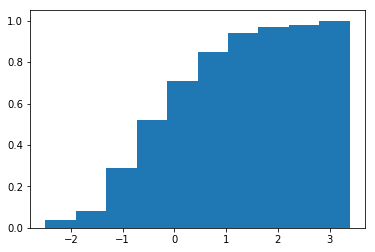

In [44]:
plt.hist(sample, normed=True, cumulative=True) # функция распределения

Попробуем задавать число карманов гистограммы вручную:

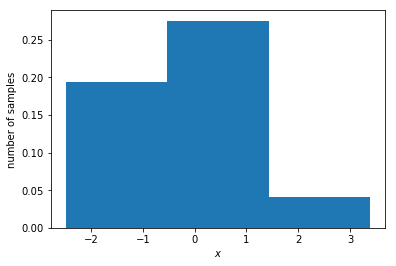

In [45]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

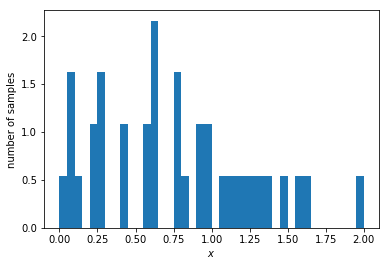

In [47]:
plt.hist(sample, bins=40, normed=True, range=(0,2)) # range - draw only on written interval
plt.ylabel('number of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

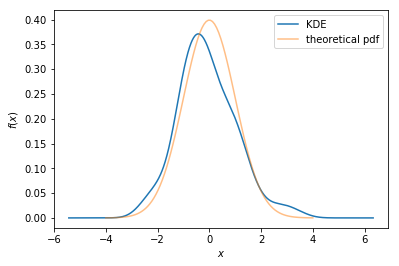

In [30]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')